In [1]:
from spectacle.core.spectra import Spectrum1D
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib notebook

# Basic absorption features

<IPython.core.display.Javascript object>


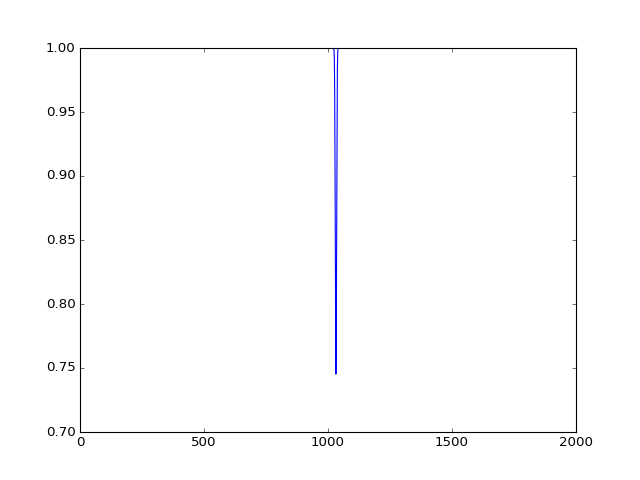

In [3]:
spectrum1 = Spectrum1D()
spectrum1.add_line(lambda_0=1.03192700E+03, f_value=0.4164, gamma=1e6,
                   v_doppler=1e8, column_density=10**14.66)

plt.plot(spectrum1.dispersion, spectrum1.flux)

# Curve of growth analysis

<IPython.core.display.Javascript object>


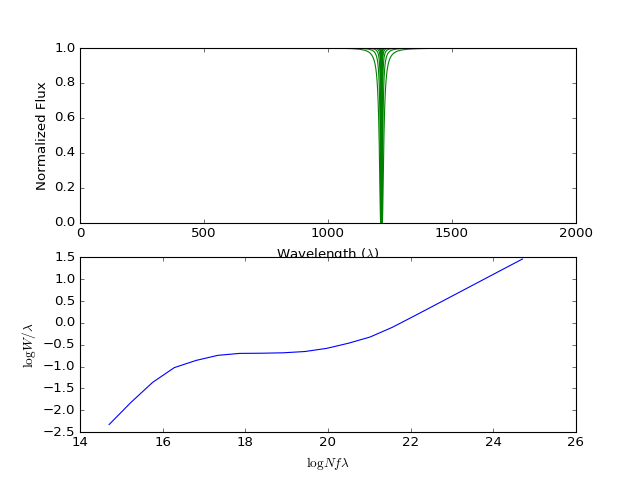

0.0046868241638061935
0.015020609139626924
0.04337417890584063
0.0946553639857442
0.13821211938646108
0.18067565608826316
0.20017536023630858
0.20196432518987698
0.20650944174615812
0.22090141743966363
0.26096226218448926
0.34196447215469983
0.47588800020368843
0.7849950807237194
1.4183192739395412
2.592282097990365
4.746535519793876
8.694141783723866
15.921259556353167
29.135567348575787


In [4]:
f, (ax1, ax2) = plt.subplots(2, 1)

log_n, log_w = [], []

for n in np.logspace(12, 22, 20):
    # Create spectrum
    spectrum2 = Spectrum1D()
    lam = 1.21567010E+03
    spectrum2.add_line(lambda_0=lam, f_value=0.4164, gamma=1e8,
                       v_doppler=1e6, column_density=n)
    
    # Append values to lists
    log_n.append(np.log10(n * 0.4164 * (lam)))
    ew, ew_uncert = spectrum2.equivalent_width()
    log_w.append(np.log10(ew))
    
    # Plot
    ax1.plot(spectrum2.dispersion, spectrum2.flux, 'g-')

ax1.set_xlabel("Wavelength ($\lambda$)")
ax1.set_ylabel("Normalized Flux")
    
ax2.plot(log_n, log_w)
ax2.set_xlabel("$\log N f \lambda$")
ax2.set_ylabel("$\log W / \lambda$")

# plt.plot(spectrum1.dispersion, spectrum1.flux)
plt.show()

# Parameter behavior analysis

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1)

for gamma in np.logspace(12, 14, 10):
    spectrum2 = Spectrum1D()
    spectrum2.add_line(lambda_0=1.03192700E+03, f_value=0.4164, gamma=gamma,
                       v_doppler=1e7, column_density=5.25e13)
    mask = (spectrum2.dispersion > 1025) & (spectrum2.dispersion < 1040)
    ax1.plot(spectrum2.dispersion[mask], spectrum2.flux[mask], 'b-')

for n in np.logspace(12, 18, 10):
    spectrum2 = Spectrum1D()
    spectrum2.add_line(lambda_0=1.03192700E+03, f_value=0.4164,
                       gamma=1e6, v_doppler=1e7, column_density=n)
    mask = (spectrum2.dispersion > 1025) & (spectrum2.dispersion < 1040)
    ax2.plot(spectrum2.dispersion[mask], spectrum2.flux[mask], 'r-')


for f in np.linspace(0.1, 1.0, 10):
    spectrum2 = Spectrum1D()
    spectrum2.add_line(lambda_0=1.03192700E+03, f_value=f, gamma=1e6,
                       v_doppler=1e7, column_density=5.25e13)
    mask = (spectrum2.dispersion > 1025) & (spectrum2.dispersion < 1040)
    ax3.plot(spectrum2.dispersion[mask], spectrum2.flux[mask], 'g-')
    
plt.show()